# Protein Subcellular Location Classification Project

This notebook outlines the end-to-end process for classifying protein subcellular locations using sequence features and machine learning models, following the three-week timeline.

Dataset: deeploc_data.fasta.
Target Models: Random Forest (RF), Support Vector Machine (SVM), Multilayer Perceptron (MLP).
Feature: Amino Acid Composition (AAC).

## WEEK 1:  Data Preparation and Exploratory Analysis

#1.1 Setup and File Loading

First, we install necessary libraries and import the core packages.

In [ ]:
!pip install biopython

In [ ]:
import pandas as pd
import numpy as np
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os

In [ ]:
# Set plotting style
sns.set_theme(style="whitegrid")
print("Libraries loaded successfully.")

# Define the uploaded FASTA file name
fasta_file = 'deeploc_data.fasta'

Libraries loaded successfully.


#1.2 FASTA Parsing and CSV Conversion
We parse the FASTA file, extract the protein ID, the target label (subcellular location), and the sequence itself.

In [ ]:
data = []
try:
    for record in SeqIO.parse(fasta_file, "fasta"):
        # The ID line format is assumed to be: >ID Location-Sublocation
        # We extract the main location as the label.
        header_parts = record.description.split()
        if len(header_parts) > 1:
            # E.g., 'Cell.membrane-M' -> 'Cell.membrane'
            location_label = header_parts[1].split('-')[0]
        else:
            # Fallback in case of unexpected format
            location_label = "Unknown"

        data.append({
            'ID': record.id,
            'Location': location_label,
            'Sequence': str(record.seq)
        })

    df = pd.DataFrame(data)
    print(f"Dataset successfully parsed. Total records: {len(df)}")
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())

except FileNotFoundError:
    print(f"Error: The file '{fasta_file}' was not found. Please ensure it is uploaded.")
    df = pd.DataFrame()
except Exception as e:
    print(f"An error occurred during parsing: {e}")
    df = pd.DataFrame()

Dataset successfully parsed. Total records: 14004

First 5 rows of the DataFrame:
       ID       Location                                           Sequence
0  Q9H400  Cell.membrane  MGLPVSWAPPALWVLGCCALLLSLWALCTACRRPEDAVAPRKRARR...
1  Q5I0E9  Cell.membrane  MEVLEEPAPGPGGADAAERRGLRRLLLSGFQEELRALLVLAGPAFL...
2  P63033  Cell.membrane  MMKTLSSGNCTLNVPAKNSYRMVVLGASRVGKSSIVSRFLNGRFED...
3  Q9NR71  Cell.membrane  MAKRTFSNLETFLIFLLVMMSAITVALLSLLFITSGTIENHKDLGG...
4  Q86XT9  Cell.membrane  MGNCQAGHNLHLCLAHHPPLVCATLILLLLGLSGLGLGSFLLTHRT...


# 1.3 Exploratory Data Analysis (EDA)
We analyze the distribution of the target variable and the length of the protein sequences.

/tmp/ipython-input-3329539517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette="viridis")


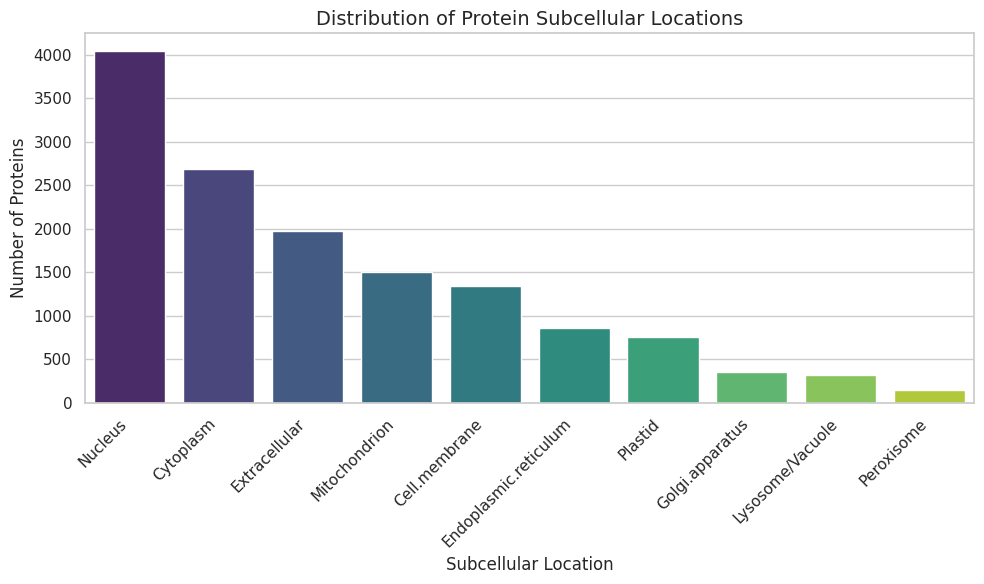

In [ ]:
if not df.empty:
    # --- A. Location Distribution ---
    plt.figure(figsize=(10, 6))
    location_counts = df['Location'].value_counts()
    sns.barplot(x=location_counts.index, y=location_counts.values, palette="viridis")
    plt.title('Distribution of Protein Subcellular Locations', fontsize=14)
    plt.xlabel('Subcellular Location', fontsize=12)
    plt.ylabel('Number of Proteins', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**--- B. Sequence Length Distribution ---**

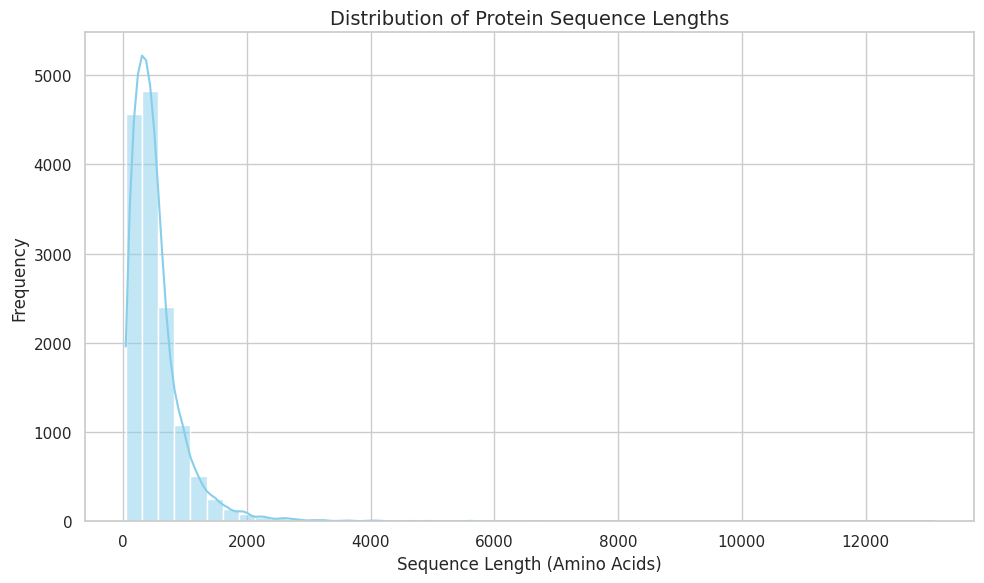

In [ ]:
    df['Sequence_Length'] = df['Sequence'].apply(len)
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Sequence_Length'], bins=50, kde=True, color='skyblue')
    plt.title('Distribution of Protein Sequence Lengths', fontsize=14)
    plt.xlabel('Sequence Length (Amino Acids)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

**Summary statistics**

In [ ]:
    print("\nSummary Statistics of Sequence Lengths:")
    print(df['Sequence_Length'].describe())


Summary Statistics of Sequence Lengths:
count    14004.00000
mean       522.44166
std        448.06671
min         40.00000
25%        249.00000
50%        421.00000
75%        649.00000
max      13100.00000
Name: Sequence_Length, dtype: float64


**Drop the temporary length column**

In [ ]:
    df.drop('Sequence_Length', axis=1, inplace=True)